In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
football = pd.read_csv('../data/preprocessed/football.csv')
football_train = pd.read_csv('../data/preprocessed/football_train.csv')
football_test = pd.read_csv('../data/preprocessed/football_test.csv')

football = football.iloc[:, 2:]
football_train = football_train.iloc[:, 2:]
football_test = football_test.iloc[:, 2:]

In [27]:
print(football.shape)

c = football.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-4470:-4460])

(3240, 399)
AwayTeam_Birmingham                DiffTeam_Swansea                0.0
wx_phrase_Showers in the Vicinity  DiffTeam_Man City               0.0
DiffTeam_Reading                   wx_phrase_Thunder               0.0
                                   wx_phrase_Wintry Mix            0.0
                                   wx_phrase_Wintry Mix / Windy    0.0
                                   day_of_week_Friday              0.0
DiffTeam_Newcastle                 DiffTeam_Middlesbrough          0.0
DiffTeam_Reading                   day_of_week_Thursday            0.0
DiffTeam_Birmingham                DiffTeam_Bournemouth            0.0
                                   DiffTeam_Brighton               0.0
                                   DiffTeam_Burnley                0.0
                                   DiffTeam_Cardiff                0.0
                                   DiffTeam_Crystal Palace         0.0
                                   DiffTeam_Huddersfield         

In [12]:
football.describe()

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,DiffTeam_Wolves,DiffGoalsFor,DiffGoalsAgainst,DiffShots,DiffShotsAgainst,DiffShotsTgt,DiffShotsTgtAgainst,DiffFKC,DiffFKW,Upset
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,...,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,14.225926,11.290123,5.884568,4.683951,10.554321,11.038580,6.022531,4.766358,1.487037,1.766049,...,0.000000,0.261728,-0.154938,1.662037,-1.527778,0.750000,-0.583951,-0.314815,0.213889,0.166667
std,5.514432,4.688615,3.393546,2.854091,3.351878,3.520249,3.133214,2.732498,1.199652,1.284801,...,0.172159,14.517899,11.221509,75.763984,75.048066,40.654583,33.313841,33.115219,35.384514,0.372736
min,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-69.000000,-44.000000,-296.000000,-353.000000,-200.000000,-160.000000,-140.000000,-154.000000,0.000000
25%,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,...,0.000000,-7.000000,-6.000000,-35.000000,-39.000000,-19.000000,-16.000000,-19.000000,-18.000000,0.000000
50%,14.000000,11.000000,5.000000,4.000000,10.000000,11.000000,6.000000,4.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.500000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,...,0.000000,7.000000,6.000000,39.000000,36.000000,20.000000,15.000000,18.000000,18.000000,0.000000
max,43.000000,30.000000,24.000000,20.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,...,1.000000,75.000000,54.000000,321.000000,328.000000,177.000000,173.000000,145.000000,166.000000,1.000000


In [13]:
football[football.isna().any(axis=1)]

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,DiffTeam_Wolves,DiffGoalsFor,DiffGoalsAgainst,DiffShots,DiffShotsAgainst,DiffShotsTgt,DiffShotsTgtAgainst,DiffFKC,DiffFKW,Upset


# PCA

(3240, 398)
[[ 8.64068218e-08  4.50818201e-08  4.13250017e-08 ... -3.38113651e-08
   0.00000000e+00  0.00000000e+00]
 [ 3.19756942e-08  7.76552574e-08  9.13591264e-09 ...  4.56795632e-08
   2.28397816e-08 -2.28397816e-08]
 [ 8.84146258e-08  8.16135007e-08  6.12101256e-08 ... -1.36022501e-08
  -6.80112506e-09  6.80112506e-09]
 ...
 [ 3.56447037e-09  1.06934111e-08  0.00000000e+00 ...  1.69312342e-08
   3.56447037e-08 -3.20802333e-08]
 [ 1.15462889e-08  7.34763839e-09  8.39730102e-09 ...  3.14898788e-09
   7.24267213e-08 -1.04966263e-08]
 [ 3.40633498e-09  9.53773795e-09  2.72506799e-09 ...  3.40633498e-08
   2.79319469e-08  2.38443449e-08]]
[9.42761002e-01 5.71289343e-02 6.43156661e-05 4.57476177e-05
 2.03427912e-11 4.18824032e-12 3.96927402e-12 1.06569796e-12
 8.89449753e-13 4.19686182e-13 2.80953200e-13 2.79063469e-13
 2.28887280e-13 1.87968359e-13 1.51209109e-13 1.43347506e-13
 1.20554530e-13 9.00516046e-14 7.72728744e-14 6.60391051e-14
 5.56362552e-14 5.22941960e-14 4.97945543e-14 4

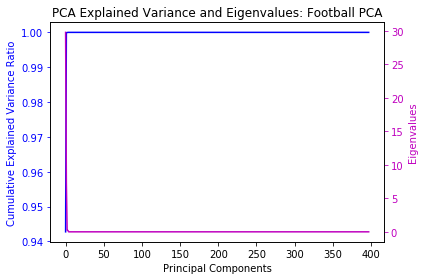

In [44]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict
from sklearn.preprocessing import normalize

def run_PCA(X,title):
    
    pca = PCA(random_state=5).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_)
    print(cum_var)
    fig, ax1 = plt.subplots()
    ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
    ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    ax2.set_ylabel('Eigenvalues', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()

    
X = football.iloc[:, :-1]
y = football.iloc[:, -1]
    
X = normalize(X)  

print(X.shape)

print(X)


#X = X[34:36, :]

run_PCA(X, "Football PCA")
    

In [62]:
X = football.iloc[:, :-1]
y_train = football_train.iloc[:, -1]
y_test = football_test.iloc[:, -1]

print(football_train.shape)
print(football_test.shape)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

X_train_pca = X_pca[:football_train.shape[0], :]
X_test_pca = X_pca[football_train.shape[0]:, :]

print(X_train_pca.shape)
print(X_test_pca.shape)


print(pca.explained_variance_ratio_) 

np.cumsum(pca.explained_variance_ratio_)

(2660, 399)
(580, 399)
(2660, 4)
(580, 4)
[7.21047550e-01 2.78860524e-01 5.06879332e-05 4.12377128e-05]


array([0.72104755, 0.99990807, 0.99995876, 1.        ])

# Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score, accuracy_score


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler().fit(X_train)

X_train = X_train_pca #scaler.transform(X_train)
X_test = X_test_pca #scaler.transform(X_test)


print(X_test)

rfc = RandomForestClassifier(n_estimators=500,max_depth=4,random_state=5,n_jobs=-1)
model = rfc.fit(X_train, y_train)

y_pred = model.predict(X_test)

#auc_train = roc_auc_score(y_train, y_pred)
auc_test = roc_auc_score(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)

#print('AUC TRAIN: ', auc_train)
print('AUC TEST: ', auc_test)
print('Accuracy TEST: ', accuracy_test)

y_pred = model.predict(X_train)

auc_train = roc_auc_score(y_train, y_pred)
accuracy_train = accuracy_score(y_train, y_pred)

#print('AUC TRAIN: ', auc_train)
print('AUC TRAIN: ', auc_train)
print('Accuracy TRAIN: ', accuracy_train)

#df_original = football.iloc[:, :-1]

#imp = model.feature_importances_ 
#imp = pd.DataFrame(imp,columns=['Feature Importance'],index=df_original.columns[::])
#imp.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
#imp['Cum Sum'] = imp['Feature Importance'].cumsum()    
# imp = imp[imp['Cum Sum']<=0.95]
#cols = imp.index.tolist()

#print(imp)

[[-4.67171272e+08  3.00556014e+08  4.96396084e+06 -3.73451491e+06]
 [ 6.24560790e+08  1.81960247e+08  2.43409677e+06  3.12667568e+05]
 [-6.76977616e+08  2.02538604e+08  5.79241638e+06 -3.58911713e+06]
 ...
 [ 7.86388459e+08  4.71414386e+08  8.06512965e+06  6.17922541e+06]
 [-6.42112367e+08  3.77503793e+08 -6.58312661e+06  7.58573389e+06]
 [ 1.11487837e+09  6.25316786e+08  1.24946866e+07  8.65245308e+06]]
AUC TEST:  0.5
Accuracy TEST:  0.7741379310344828
AUC TRAIN:  0.5
Accuracy TRAIN:  0.8462406015037593
